# Practical Introduction to Jupyter Notebook

> **Skills to take away**
>
> + *basic*: create a new notebook, create a cell, choose cell type, write/execute code cells, write simple text cells.
> + *medium*: use python help for module and functions, basic formatting of text in markdown
> + *expert*: advanced formatting (table, links, code, quotation, equations with LaTex, ...)

## What is a notebook

A notebook is environment combining code edition/execution and text edition (for documentation, anotation, etc ...) with nice formatting options. The basic element of a notebook is a **cell**, which can be either a **code cell** or a **markdown cell** (as seen later in this chapter, *markdown* is a system to format text using raw text only). The creation of a new cell can done using the "plus" button in the top menu, the type of the cell (code or markdown) can be selected using the drop-down menu (there are actually more categories but only code and markdown matters). They are few keyboard shortcuts which are all accessible using the small "keyboard button" in the top menu.

## Cells of code

### Input and output

There is an example of cell code just below, in which two variables are defined ($x$ and $y$) first and the sum is computed. To execute the code of this cell, one can do `SHIFT`+`ENTER` (or click on "run" button in the top menu - less convenient).

In [1]:
# Variable definition
x = 2
y = 3

# Compute the sum
x + y

5

The output of the last instruction is displayed after the mention `Out[CellNumber]`, while the input (*i.e.* the code itself) in the cell is after the mention `In[CellNumber]`. Note that if this code would be executed as normal python file, they would be no output in the terminal: *this behaviour is specific to notebooks*. If the last instruction doesn't produce any result, nothing is displayed at the execution of the cell:

In [2]:
x = 4

If we want to remove the output of the last instruction (can be useful when doing plots), we can use a `;` at the end of the last instruction:

In [3]:
# Variable definition
x = 2
y = 3

# Compute the sum
x + y;

If the code actually prints something (as it would do in a terminal), then the same thing will be printed in the notebook but the without the mention `Out[CellNumber]`:

In [4]:
# Variable definition
x = 2
y = 3

# Compute and print the sum
print(x + y)

5


### Be careful: order of execution matters!

When working with notebooks, we usually have several cells having each their piece of code. This induces a counter-intuitive behaviour which can cause mistakes if cells are not executed in the proper order. An example is given below:

In [5]:
## CODE 1
x = 2
y = 3
print(x+y)

5


In [6]:
## CODE 2
x = 10
print(x+y)

13


In [7]:
## CODE 3
y = 10
print(x+y)

20


The order of the execution impact the final results:
 + 1 -> 2 -> 3 leads to 5, 13, 20
 + 1 -> 3 -> 2 leads to 5, 20, 12
 
This is again specific to notebooks: the value of a variable in memory is used at the time when a cell is executed. In a normal python file, every instructions is executed from A to Z when the command `python myCode.py` is launched in a terminal.

### A realistic example with several code cells

Usually, we can use the cell structure to organize the code. The following example shows a first cell containing initialization of some variable, a second cell with the main function defined, and a third cell with a code using both initialized variable and the function.

In [8]:
n1 = 10
n2 = 50
n3 = 99

In [9]:
def SumUpToN(n):
    '''
    This function returns the sum of the n first integers:
       sum = 1 + 2 + ... + n
    '''
    
    # Initisalisation
    s = 0
    
    # Loop over from to n
    for i in range(n+1):
         s = s + i
            
    # Return the result
    return s

In [10]:
for n in [n1, n2, n3]:
    print('n = {} --> SUM = {}'.format(n, SumUpToN(n)))

n = 10 --> SUM = 55
n = 50 --> SUM = 1275
n = 99 --> SUM = 4950


### Example with plots

Relatively often, doing plots is a valuable approach to demonstrate a point or gain intuition on data. Jupyter notebooks allow to display plots which is produced by a code, as shown by the example below.

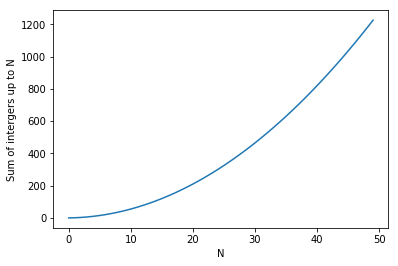

In [11]:
# import python plotting tool
import matplotlib.pyplot as plt

# Define its behaviour in the notebook.
# Note: this command needs to be run once per notebook, note per cell.
%matplotlib inline

# Define Xs = [0, 1, ... 50].
Xs = range(50)

# Define Ys = [SumUpToN(0), SumUpToN(1), ..., SumUpToN(50)].
Ys = [SumUpToN(x) for x in Xs]

# Plot Ys vs Xs.
plt.plot(Xs, Ys)

# Add label to x-axis.
# Mote the ";" to avoid to have line printed (try without to check).
plt.xlabel('N')
plt.ylabel('Sum of intergers up to N');

### How to use python documentation

Python libraries come with a documentation, both at the package level and a the function level (a package is a group of defined functions; numpy is package). It is possible to access the documentation while coding directly in the notebook. The example shows how to print the help of a given function from numpy (used to generate random numbers between 0 and 1).

In [12]:
import numpy as np
help(np.random.rand)

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]

It is also possible to write a documentation for the function that we define in the notebook, *via* the **docstring** (text at the begining of the function which is between `'''`). This documentation is also accessible on-the-fly thanks to the keyboad `SHIFT`+`TAB` when the cursor is after the first parenthesis, or can be printed using `help(SumUpToN)`

In [13]:
help(SumUpToN)

Help on function SumUpToN in module __main__:

SumUpToN(n)
    This function returns the sum of the n first integers:
       sum = 1 + 2 + ... + n



## Cells of text

The cells of text are used to document the notebook, *e.g.* explaining what is the goal of the next cell of code or describing the context of the analysis done in the whole notebook. Several syntax are supported by notebooks to format the text, and only the main features will be presented here. One can remember the markdown for most of the formating style and basic $\LaTeX$ for mathematical symbols and equations. Note that HTML sytntax is also supported.

### The markdown syntax

+ `*italic text*` $\to$ *italic text*
+ `**bold text**` $\to$  **bold text**
+ ``` `line of code` ``` $\to$  `line of code`
+ `[link](url)` $\to$ [link](url)
+ `![name](image.jpg)` $\to$ include an image in the notebook
+ Table formating:
```
| col1 | col2 |
|------|------|
|   y  |   n  |
|   y  |   y  |
|   n  |   n  |
```

renders as

| col1 | col2 |
|------|------|
|   y  |   n  |
|   y  |   y  |
|   n  |   n  |

 + headers are done using `#` symbols at the begining of a cell:
 ```
 # Title
 blabla
 ## Subtitle
 blabla
 ### subsubtitle
 blabla
 ```
 renders as

<hr>
 
 # Title
 blabla
 ## Subtitle
 blabla
 ### subsubtitle
 blabla
 
 <hr>

   + We can also put some code in a markdown cell, but it will not be executed. This can be done with such a block, where the langage can be specifed too:

<pre>    
```python
# Python code
list = [0, 1, 2, 3]
for i in list:
    print(i)
```
</pre>


renders as 


```python
# Python code
list = [0, 1, 2, 3]
for i in list:
    print(i)
```

   + it is also possible to use quotation-like formatting:
```
> One day, one man said this would be a nice quotation.
>
> Romain M.
```

renders as

> One day, one man said this would be a nice quotation.
>
> Romain M.


### Typical use of LaTeX

$\LaTeX$ is a (very rich) langage on its own to format text and it will not be touched in here. The typical needs for $\LaTeX$ in notebooks is for mathematical symbols and equations. For example:
```
$$
\sum_{i=0}^{n} i^2 \neq \int^{\infty}_{0} \varphi \times f(\theta) \times \sin\left(\frac{\pi x}{x+1}\right) \, \mathrm{d}x
$$
```
renders as

$$
\sum_{i=0}^{n} i^2 \neq \int^{\infty}_{0} \varphi \times f(\theta) \times \sin\left(\frac{\pi x}{x+1}\right) \, \mathrm{d}x
$$




### Typical use of HTML

The same command stands for HTML too: this is a rich langage on its own (together with CSS) and it will not be touched here. Just keep in mind that you can use it to do some cosmetics. For example:

```
<div style="color:white;background:blue;width:50%;padding:10px;font-size:18px;text-align:center">
This is a block with a HTML + CSS style!
</div>
```
renders as

<div style="color:white;background:blue;width:50%;padding:10px;font-size:18px;text-align:center">
This is a block with a HTML + CSS style!
</div>